project3


Group number 6 Baraa Nidal Ghannoum Tom Mantel Mubarik Omar ALi Abdi

Introduction:

Having the ability to predict the foreseeable future in industries related to finance, engineering, and buisness can become a crucial (element) to posess. A mathematical tecnhiqe which allows us to make assumptions on how certain outcomes might play out, only through past information is a vialible tool used in many differents fields. This is the foundation set by the Monte Carlo simulation [1]. In this project we will use Monte Carlo simulation to estimate the volume of a DNA structure in three dimensions. We will also estimate the uncertainty of atoms position in (x, y, z) coordinates [2]. 

Task 0

In [ ]:
#Import definitions for the simulation and further plottings
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
DNA_Coord = "dna_coords.txt"# File containing DNA coordinates
units_inside = "nm"  # Units for distances inside the file
margin = 0.2  # Margin for plotting



In [ ]:
'''now we load the txt file containing the coordinates of the DNA segments'''

'now we load the txt file containing the coordinates of the DNA segments'

In [ ]:
load = np.loadtxt(DNA_Coord, usecols=(1,2,3))  # Load coordinates from file

'''Now we need to handle the units.'''

if units_inside.lower() in ["a", "ang", "angstrom", "Å"]:
    load_nm = load / 10.0
elif units_inside.lower() == "nm":
    load_nm = load
else:
    raise ValueError("Unknown length units. Use 'A' or 'nm'.")

In [ ]:
mins = load_nm.min(axis=0)
maxs = load_nm.max(axis=0)

origin = mins - margin
L = (maxs - mins) + 2*margin
Vbox = np.prod(L)

print(f"Origin (nm): {origin[0]:.4f}, {origin[1]:.4f}, {origin[2]:.4f}")
print(f"Box dims (nm): Lx={L[0]:.4f}, Ly={L[1]:.4f}, Lz={L[2]:.4f}")
print(f"Box volume (nm^3): {Vbox:.4f}")

Origin (nm): -48.3807, -17.9708, -10.1919
Box dims (nm): Lx=17.8080, Ly=20.7130, Lz=20.2890
Box volume (nm^3): 7483.7418


In [ ]:
'''As DNA; you'd wish multiple samples to conclude your research, 
and to gain a broader aspect of data sampling. 
For this we've chosen to work with 25 samples.
We will be using temperature in the form of kelvin (K) as our variable.
aswell as implementing the boltsman constant (k) in our calculations.'''

Topic 1

Task 1

Task 2

Task 3

Task 4


Task 5

Task 6

In [ ]:
'''To make the code as crammed as possible, 
we researched into numpy to find possible solutions on how to generate 10 spheres with minimal coding. 
We landed on using the randomizer in uniform standard, 
where we define a minimum radius and a maximum radius, 
with generating n-amount of spheres, which in our case is 10. 
Previously done this task before in a similar way to generate - 
multiple lines in a very small line of code (codewars).'''

n_spheres = 10
r_min, r_max = 0.1, 0.3   # nm

radius_sph = np.random.uniform(r_min, r_max, size=n_spheres)


'''This code should calculate all sphere centers with numpy, without the need of loops.'''
centers = origin + radius_sph[:, None] + (L - 2*radius_sph[:, None]) * np.random.rand(n_spheres, 3)

print("centers:\n", centers)
print("radii:\n", radius_sph)

Task 7


In [ ]:
'''In task 7 we define the Monte Carlo function to calculate the fraction of points inside the spheres. 
I first made the formulas sort of by hand, 
and used previous experience from codewars and formula->to->code to implement the numpy code.
After that I researched numpy documentation to find the best functions to use to make the code as efficient as possible.
Which gave me the defined function below.'''

def mc_fraction_in_spheres(centers, radii, origin, L, n_points):
    pts = origin + np.random.rand(n_points, 3) * L  # Here we generate random points in the box         
    diff = pts[:, None, :] - centers[None, :, :]    # Here we calculate the difference vectors         
    dist2 = np.sum(diff**2, axis=2)                 # Here we calculate squared distances         
    inside_any = (dist2 <= radii**2).any(axis=1)    # Here we check if the points are inside any sphere         
    return inside_any.mean()

In [ ]:
'''Finally we plot the results from the Monte Carlo simulation.'''

Ns     = np.logspace(3, 6, 8, dtype=int)   # 1e3 ... 1e6 points
fracs  = [mc_fraction_in_spheres(centers, radius_sph, origin, L, N) for N in Ns]

plt.plot(Ns, fracs, marker='o')
plt.xscale('log')
plt.xlabel("Number of random points")
plt.ylabel("Fraction inside 10 spheres")
plt.show()

Task 8


In [ ]:
'''Continueing from our test from task 7, we're now using the DNA coordinates file as our data to analyze.
The analyzed atoms will be implemented through functions from numpy to make the code as efficient as possible.
'''

read_file = "dna_coords.txt"

# read: column 0 = symbol (str), columns 1–3 = x,y,z (float), in Å
data    = np.genfromtxt(read_file, dtype=None, encoding=None)
symbols = data[:, 0]
xyz_A   = data[:, 1:4].astype(float)

# Å -> nm
xyz_nm  = xyz_A / 10.0

In [ ]:
'''In this small code we the create a dictionary containing the covalent radiuses of the atoms.'''

r_pm = {   # picometers, sets the radiuses for the different atoms.
    "H": 120,
    "C": 170,
    "N": 155,
    "O": 152,
    "P": 180,
}

r_nm = np.array([r_pm[s] for s in symbols]) * 1e-4   # loops through every symbol in our symbols.

Task 9

In [ ]:
margin_nm = 0.2 # In nanometers (nm)

mins   = xyz_nm.min(axis=0) - margin_nm #Finding the minimum xyz values in nm
maxs   = xyz_nm.max(axis=0) + margin_nm #Finding the maximum xyz values in nm
origin = mins # Setting the origin to the minimum values minus margin
L      = maxs - mins # Finding the length of each side of the box
Vbox   = np.prod(L) # Finding the volume of the box

Task 10

In [ ]:
'''In task 10 we use the same function as in task 7 using the same monte carlo method, 
but we've now put in the work of the DNA coordinates, instead of using dummy test values. 
Instead of a given box dimension that is randomized, we use a box definition fitting inside the DNA coordinate file.
In the end we'll have a fraction of points inside the DNA structure, instead of points in randomized spheres as done in task 7. '''

def mc_fraction_in_dna(xyz_nm, r_nm, origin, L, n_points):
    pts  = origin + np.random.rand(n_points, 3) * L    
    diff = pts[:, None, :] - xyz_nm[None, :, :]   # instead of using centers, we use the xyz coordinates of the DNA atoms.      
    dist2 = np.sum(diff**2, axis=2)                   
    inside_any = (dist2 <= r_nm**2).any(axis=1)  # instead of radius_sph in task 7, we use given radius r_nm of the DNA atoms.         
    return inside_any.mean()

In [ ]:
Ns    = np.logspace(3, 6, 7, dtype=int)   # adjust upper limit if slow
fracs = [mc_fraction_in_dna(xyz_nm, r_nm, origin, L, N) for N in Ns]

plt.plot(Ns, fracs, marker='o')
plt.xscale('log')
plt.xlabel("Number of random points")
plt.ylabel("Fraction inside DNA spheres")
plt.show()

# final DNA volume estimate (using largest N)
V_DNA = fracs[-1] * Vbox
print("Estimated DNA volume (nm^3):", V_DNA)

Topic 2

To create a function where  a random set of walkers are randomly generated and iniate movement without order, the monte carlo method can be implimented to solve for the position before movement and after movement [3].

Task 1

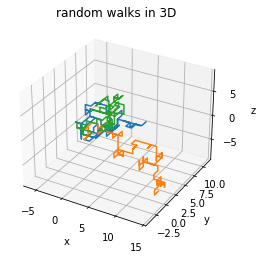

In [51]:
'To make a function of random walkers in 3D space from different positions, we can use the following libraries like numpy for numerical computation and matplotlib for plotting [3].'
'The following script was based upon the example from codingem.com for random walk in 3D [3].'

def randomwalk3D(n_walkers, n_steps):
    x, y, z = np.zeros(n_steps), np.zeros(n_steps), np.zeros(n_steps) # defining 3D arrays

    directions = ["up", "down", "left", "right", "in", "out"] # defining the direction which can be taken in 3d space
    for i in range(1, n_steps):
        step = random.choice(directions)  # randomizing steps taken 
        
        if step == "right":
            x[i] = x[i - 1] + 1
            y[i] = y[i - 1] 
            z[i] = z[i - 1] 
        elif step == "left":
            x[i] = x[i - 1] - 1
            y[i] = y[i - 1] 
            z[i] = z[i - 1]
        elif step == "up":
            x[i] = x[i - 1] 
            y[i] = y[i - 1] + 1
            z[i] = z[i - 1]  
        elif step == "down":
            x[i] = x[i - 1] 
            y[i] = y[i - 1] - 1 
            z[i] = z[i - 1] 
        elif step == "in":
            x[i] = x[i - 1] 
            y[i] = y[i - 1] 
            z[i] = z[i - 1] - 1 
        elif step == "out":
            x[i] = x[i - 1] 
            y[i] = y[i - 1] 
            z[i] = z[i - 1] + 1

    return x, y, z

n_walkers = 3  # amount of walkers
n_steps = 100  # amount of steps

fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')  # Creating a 3D space and a figure in 3D

for _ in range(n_walkers):   # Making a loop for the walkers
    x, y, z = randomwalk3D(1, n_steps) 
    ax.plot(x,y,z)
ax.set_title('random walks in 3D')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

The figure above illustrates how the application of the Monte Carlo method looks like with a random walker simulator. Which gives us different results each attempt.

Task 2

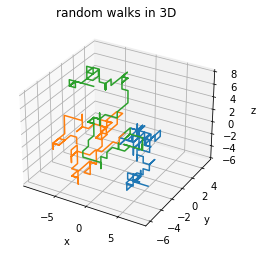

In [ ]:
'To make a fast function of random walkers in 3D space we can implement the same method as above but optimize it for speed.'


def fastrandomwalk3D(n_walkers, n_steps):
    x, y, z = np.zeros(n_steps), np.zeros(n_steps), np.zeros(n_steps) # defining 3D arrays

    directions = ["up", "down", "left", "right", "in", "out"] # defining the direction which can be taken in 3d space
    for i in range(1, n_steps):
        step = random.choice(directions)  # randomizing steps taken 
        
        if step == "right":
            x[i] = x[i - 1] + 1
            y[i] = y[i - 1] 
            z[i] = z[i - 1] 
        elif step == "left":
            x[i] = x[i - 1] - 1
            y[i] = y[i - 1] 
            z[i] = z[i - 1]
        elif step == "up":
            x[i] = x[i - 1] 
            y[i] = y[i - 1] + 1
            z[i] = z[i - 1]  
        elif step == "down":
            x[i] = x[i - 1] 
            y[i] = y[i - 1] - 1 
            z[i] = z[i - 1] 
        elif step == "in":
            x[i] = x[i - 1] 
            y[i] = y[i - 1] 
            z[i] = z[i - 1] - 1 
        elif step == "out":
            x[i] = x[i - 1] 
            y[i] = y[i - 1] 
            z[i] = z[i - 1] + 1

    return x, y, z

n_walkers = 3  # amount of walkers
n_steps = 100  # amount of steps

fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')  # Creating a 3D space and a figure in 3D

for _ in range(n_walkers):
    x, y, z = fastrandomwalk3D(1, n_steps)   # Making a loop for the walkers
    ax.plot(x,y,z)
ax.set_title('random walks in 3D fast')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()


Task 3

A great methodology which can be implemented for calculating the accessible volume of DNA is to model the DNA structure as a polymer structure using methods like random walker simulation from previous task 1 and 2 of topic 2 [4].


Task 4

The process of calculating the accessible volume of DNA can begin with defining the initial positons of the walkers by giving them randomized starting position. Then the making of discrete set of directions the walkers can make in a three dimensional space like. Up, down, left, right, in, and out. This is done by adding or subracting x, y, and z values by 1. Once that's settled we can generate the parameters such as the amount of elements in the DNA like, hydrogen, oxygen, nitrogen, carbon, and phospo, and define them as walkers. And the distance between each element as steps between each element. To verify this method is correct, a good amount of testing can be initiaded and compare each test result with each other to find any consistency. 

Task 5

In [ ]:
'The following test conducted will be the random walker simulation with the goal of calculating the accessible volume of DNA. this script builds upon the previous ones used on task 1, 2 of random walker function' 

## Phase 1: Defining directions and dimensions the walker can traverse

def DNArandomwalk3D(n_steps):
    x, y, z = np.zeros(n_steps), np.zeros(n_steps), np.zeros(n_steps)

    directions = ["up", "down", "left", "right", "in", "out"] # defining the direction which can be taken in 3d space
    for i in range(1, n_steps):
        step = random.choice(directions)  # randomizing steps taken 
        
        if step == "right":
            x[i] = x[i - 1] + 1
            y[i] = y[i - 1] 
            z[i] = z[i - 1] 
        elif step == "left":
            x[i] = x[i - 1] - 1
            y[i] = y[i - 1] 
            z[i] = z[i - 1]
        elif step == "up":
            x[i] = x[i - 1] 
            y[i] = y[i - 1] + 1
            z[i] = z[i - 1]  
        elif step == "down":
            x[i] = x[i - 1] 
            y[i] = y[i - 1] - 1 
            z[i] = z[i - 1] 
        elif step == "in":
            x[i] = x[i - 1] 
            y[i] = y[i - 1] 
            z[i] = z[i - 1] - 1 
        elif step == "out":
            x[i] = x[i - 1] 
            y[i] = y[i - 1] 
            z[i] = z[i - 1] + 1

    return x, y, z

## phase 2: calculate the accessible volume of DNA by creating a function

def accessible_volume(hydrogen, oxygen, carbon, grid_size=50): # Creating a 3d grid for the volume
    grid = np.zeros((grid_size, grid_size, grid_size)) 
    coordinates = np.vstack((hydrogen, oxygen, carbon)).T + grid_size / 2 # keep coordinates as positive values
    coordinates = np.clip(coordinates, 0, grid_size - 1)# keep the coordinates inside the grid
    
    # Converting the coordinates to integers

    coordinates_int = coordinates.astype(int)
    grid[coordinates_int[:,0], coordinates_int[:,1], coordinates_int[:,2]] = 1
    filled = np.sum(grid) # Occupied grids
    total = grid_size ** 3   # Total amount of points in the grid
    return total - filled 

n_simulations = 5
n_steps = 50

for i in range(n_simulations):
    hydrogen, oxygen, carbon = DNArandomwalk3D(n_steps)
    vol = accessible_volume(hydrogen, oxygen, carbon)  # Accessible volume
    
print("Accesible volume: ", int(vol))


Accesible volume:  124969


Self reflection

Mubarik: Working on this project gave me an insight and a deeper understanding of the Monte Carlo method and it's applications in the study of chemistry like DNA structure coding. At first, it was challenging with setting up random walk functions in three dimensions, but as I progresed it became easier to model these functions. 

Tom: Programming task 6-10 was a really fun experience as I had encountered such tasks before in when i practised python using Codewars, this gave me the good idea to look back at previous tasks i did on the website. From which i did some more tasks resembling the parts that I did, and eventually managed to produce a very slim and short program without using too much codelines, yet resulting in the same output. I honestly believe codewars to be a better source to use than using AI, as it gives you the challenge to change your code repetitively in order to make it as slim as possible. I also used the simplicity of pen and paper to create the formulas through the help with a "from formula to code" website.

Usage of AI:

Mubarik: I used chatGPT for searching for viable sources of methods of accessible volume calculations of DNA. Were I found the following source: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0013806 

References

[1] codewars, a website where you can try out different programming problems at different difficulties uploaded from people around the world, link: https://www.codewars.com/ (Accessed Nov 1st)

[2] Numpy, all you need to know about numpy programming, link: https://numpy.org/doc/stable/index.html (Accessed: Nov 2nd)

[3] fromformulatocode, making formulas to python code to save time: Link: http://fromformulatocode.com/generate (Accessed: Nov 2nd)

[4] amazon, "What is The Monte Carlo Simulation", aws.amazon.com, [Online], Available: https://aws.amazon.com/what-is/monte-carlo-simulation/ (accessed: Nov. 05. 2025)

[5] Medium, "Monte Carlo Simulation in Python", medium.com, [Online], Available: https://medium.com/@whystudying/monte-carlo-simulation-with-python-13e09731d500 (accessed: Nov. 05. 2025)

[6] codingem, "Random Walk in Python (1D, 2D, and 3D with Examples)", codingem.com, [Online], Available: https://www.codingem.com/random-walk-in-python/ (accessed: Nov. 06. 2025)

[7] M. Buenemann, and P. Lenz, "A Geometrical Model for DNA Organization in Bacteria", plos.org, Published: November 3, 2010, [Online], Available: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0013806 (accessed: Nov. 06. 2026) 